In [1]:
import tensorflow as tf
from keras import models
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
animal_classifier = models.load_model('saved_models\\ensemble_training\\animal_recogniser\\v2-2023-2-10-13-25-17.h5')
car_classifier = models.load_model('saved_models\\ensemble_training\\car_recogniser\\base-2023-2-10-13-42-46.h5')
human_classifier = models.load_model('saved_models\\ensemble_training\\human_recogniser\\test5-2023-2-10-16-33-53.h5')

In [3]:
animal_classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 16)        2064      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 16)      

In [4]:
car_classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 61, 61, 16)        2064      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 16)      

In [5]:
human_classifier.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 31, 31, 16)        2320      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 15, 15, 8)         1160      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 7, 7, 8)         

In [34]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

accuracy = BinaryAccuracy()
precision = Precision()
recall = Recall()

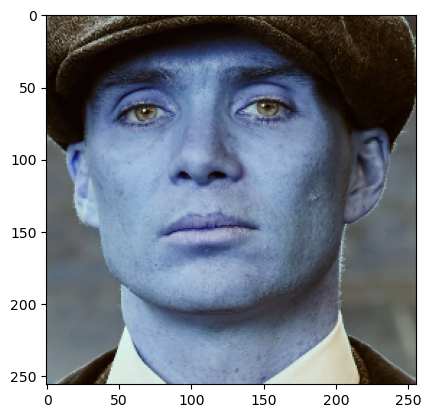

In [152]:
test_image = cv2.imread('test_images/11_2.png')
resized_image = tf.image.resize(test_image, (256, 256))
plt.imshow(resized_image.numpy().astype(int))
plt.show()

In [153]:
yhats = []
yhats.append(animal_classifier.predict(np.expand_dims(resized_image / 255, 0)).tolist()[0])
yhats.append(car_classifier.predict(np.expand_dims(resized_image / 255, 0)).tolist()[0])
yhats.append(human_classifier.predict(np.expand_dims(resized_image / 255, 0)).tolist()[0])

In [154]:
yhat_maximum = yhats[0][0]
yhat_maximum_index = 0
for i in range(1, len(yhats)):
    if yhats[i][0] > yhat_maximum:
        yhat_maximum = yhats[i][0]
        yhat_maximum_index = i

In [155]:
print(yhat_maximum, yhat_maximum_index)

0.5636982917785645 2


In [156]:
labels = ["animal", "car", "human"]
print("The image shows a(n) {} with {} possibility.".format(labels[yhat_maximum_index], yhat_maximum))

The image shows a(n) human with 0.5636982917785645 possibility.


In [157]:
yhats

[[0.13184428215026855, 0.8681556582450867],
 [0.0638975128531456, 0.9361024498939514],
 [0.5636982917785645, 0.43630170822143555]]